# 🧠 Introduction to Quantum Computing: From Qubits to Circuits

Welcome to this hands-on coding session on **Quantum Computing**!

Today, we'll take our first steps into the world of quantum mechanics applied to computation. Using **Python** and **Qiskit** — IBM’s open-source quantum computing framework — we’ll explore the fundamental building blocks of quantum programs: **qubits**, **quantum gates**, and **quantum circuits**.

Whether you're new to quantum computing or just starting to code with Qiskit, this notebook is designed to give you an intuitive, practical introduction.

---

### 🔧 What you'll learn:
- What qubits are and how they differ from classical bits  
- How to create and manipulate quantum states using gates like `H`, `X`, `Z`, and `CX`  
- How to build, visualize, and simulate quantum circuits  
- How measurement works in quantum mechanics  
- How to interpret simulation results from quantum experiments

---

### 🚀 Getting Started

1. **Download this notebook** (`.ipynb` file)
2. **Open it in [Google Colab](https://colab.research.google.com/)** for a fully interactive experience (no setup needed!)
3. Run each cell and explore the results. Feel free to tweak the code and ask *“what happens if...?”*

---

Let's dive into the quantum world — where information is weird, probabilities are powerful, and entanglement is your new best friend.


## Install dependencies

These are packages, pieces of code someone else wrote, that adds some features to python.

In [33]:
!pip install qiskit qiskit-aer matplotlib pylatexenc --quiet

In [76]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector
import pylatexenc
import matplotlib.pyplot as plt
%matplotlib inline
print("Qiskit dependencies installed successfully.")


Qiskit dependencies installed successfully.


## 🧱 Qubits and Superposition

In classical computing, the basic unit of information is the **bit**, which can be either `0` or `1`. In quantum computing, we use **qubits**.

A **qubit** (quantum bit) can be in a state |0⟩, |1⟩, or any **superposition** of the two:

$$
|\psi\rangle = \alpha|0\rangle + \beta|1\rangle \quad \text{with} \quad |\alpha|^2 + |\beta|^2 = 1
$$

We’ll use Qiskit to create and visualize qubit states. Let’s begin by importing the necessary modules and initializing a qubit.


In [35]:
# We first need to define our simulator
simulator = AerSimulator()

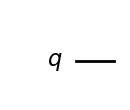

In [48]:
# Initialise a qbit 
qc = QuantumCircuit(1)
qc.draw('mpl')
plt.show()

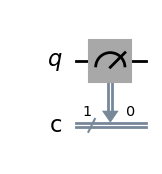

In [49]:
# Simulate the circuit and measure the qbit
qc = QuantumCircuit(1, 1)
qc.measure(0, 0)
qc.draw('mpl')
plt.show()

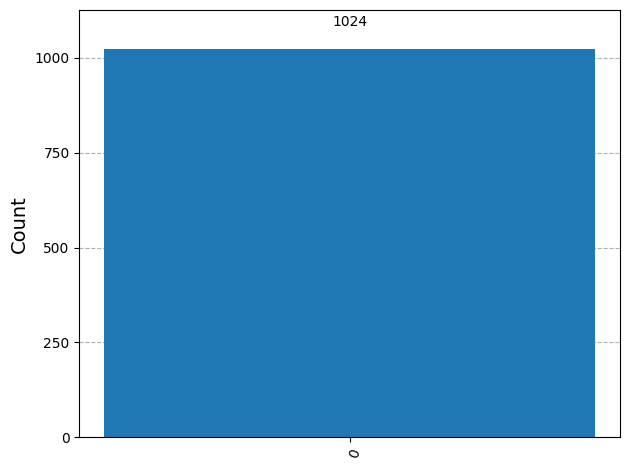

In [50]:
# Simulate and measure 
results = simulator.run(transpile(qc, simulator), shots = 1024).result()
counts = results.get_counts()
plot_histogram(counts)
plt.show()

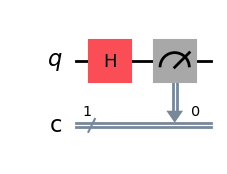

In [51]:
# Put our qbit in superposition
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0, 0)
qc.draw('mpl')
plt.show()

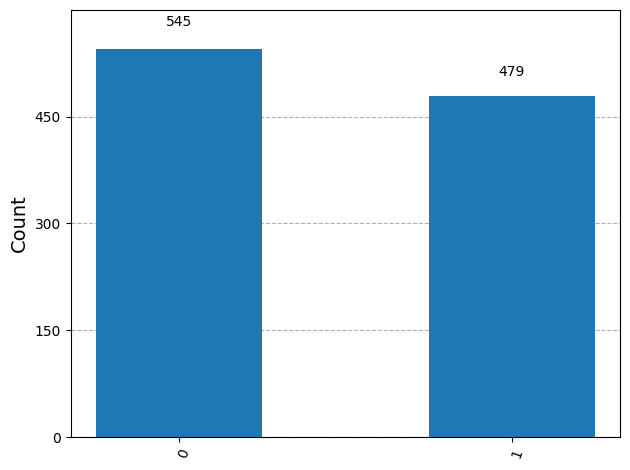

In [52]:
# Simulate and measure 
results = simulator.run(transpile(qc, simulator), shots = 1024).result()
counts = results.get_counts()
plot_histogram(counts)
plt.show()

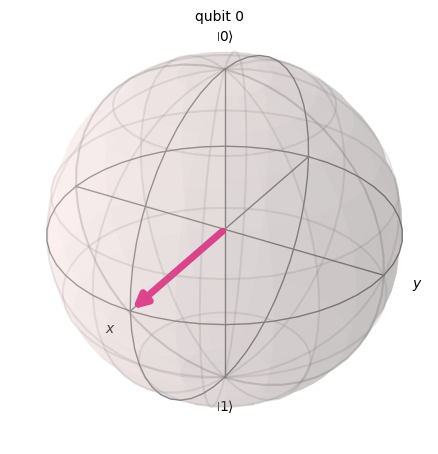

In [79]:
qc = QuantumCircuit(1)
qc.h(0)

state = Statevector.from_instruction(qc)

plot_bloch_multivector(state)
plt.show()

## 🎛️ Quantum Gates

Quantum gates are the operations we apply to qubits to change their state. They are like logic gates in classical computing but act on quantum states using **unitary matrices**.

Here are some basic single-qubit gates:

- **X gate (NOT):** flips |0⟩ ↔ |1⟩  
- **H gate (Hadamard):** creates superposition  
- **Z gate:** adds a phase to |1⟩  
- **S, T gates:** phase gates with π/2 and π/4 shifts

We’ll now apply these gates to qubits and visualize how the state changes.



### Hadamard (H) Gate
- **Effect**: Creates superposition, putting a qubit in a mix of 0 and 1 (e.g., |0⟩ to (|0⟩ + |1⟩)/√2).
- **Matrix Form**:
  $$
  H = \frac{1}{\sqrt{2}}
  \begin{bmatrix}
  1 & 1 \\
  1 & -1
  \end{bmatrix}
  $$
- **Analogy**: Like spinning a coin—it’s heads and tails until measured.
- **Syntax**: `qc.h(0)` (apply to qubit 0).
- **Example**: Applying H to |0⟩ gives ~50% chance of measuring 0 or 1.

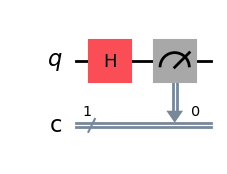

In [53]:
# Hadamard gate example
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0, 0)
qc.draw('mpl')
plt.show()


### X Gate
- **Effect**: Flips the state of a qubit (|0⟩ to |1⟩ and vice versa).
- **Matrix Form**:
  $$
  X = \begin{bmatrix}
  0 & 1 \\
  1 & 0
  \end{bmatrix}
  $$
- **Analogy**: Like a light switch—turns on (1) or off (0).
- **Syntax**: `qc.x(0)` (apply to qubit 0).
- **Example**: Applying X to |0⟩ gives |1⟩.

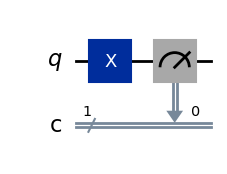

In [54]:
qc = QuantumCircuit(1, 1)
qc.x(0)
qc.measure(0, 0)
qc.draw('mpl')
plt.show()

### Z Gate
- **Effect**: Adds a phase to the |1⟩ state (|0⟩ remains unchanged).
- **Matrix Form**:
  $$
  Z = \begin{bmatrix}
  1 & 0 \\
  0 & -1
  \end{bmatrix}
  $$
- **Analogy**: Like a phase shift in sound waves—changes the wave without changing its amplitude.
- **Syntax**: `qc.z(0)` (apply to qubit 0).
- **Example**: Applying Z to |1⟩ gives -|1⟩ (flips the sign).

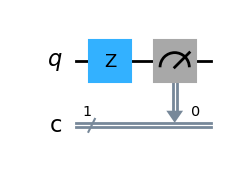

In [55]:
qc = QuantumCircuit(1, 1)
qc.z(0)
qc.measure(0, 0)
qc.draw('mpl')
plt.show()

### CNOT (CX) Gate
- **Effect**: A two-qubit gate that flips the second qubit (target) if the first qubit (control) is |1⟩.
- **Matrix Form**:
  $$
  CX = \begin{bmatrix}
  1 & 0 & 0 & 0 \\
  0 & 1 & 0 & 0 \\
  0 & 0 & 0 & 1 \\
  0 & 0 & 1 & 0
  \end{bmatrix}
  $$
- **Analogy**: Like a light switch that controls another light—if the first is on, the second turns on.
- **Syntax**: `qc.cx(0, 1)` (apply to qubits 0 and 1).
- **Example**: If qubit 0 is |1⟩ and qubit 1 is |0⟩, applying CX flips qubit 1 to |1⟩.

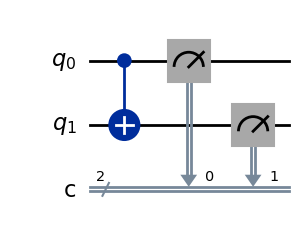

In [56]:
qc = QuantumCircuit(2, 2)
qc.cx(0, 1)
qc.measure(0, 0)
qc.measure(1, 1)
qc.draw('mpl')
plt.show()


### SWAP Gate
- **Effect**: Swaps the states of two qubits.
- **Matrix Form**:
  $$
  SWAP = \begin{bmatrix}
  1 & 0 & 0 & 0 \\
  0 & 0 & 1 & 0 \\
  0 & 1 & 0 & 0 \\
  0 & 0 & 0 & 1
  \end{bmatrix}
  $$
- **Analogy**: Like swapping two cards in a deck.
- **Syntax**: `qc.swap(0, 1)` (apply to qubits 0 and 1).
- **Example**: If qubit 0 is |0⟩ and qubit 1 is |1⟩, applying SWAP changes them to |1⟩ and |0⟩ respectively.

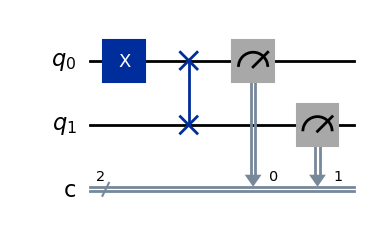

In [57]:
qc = QuantumCircuit(2, 2)
qc.x(0)
qc.swap(0, 1)
qc.measure(0, 0)
qc.measure(1, 1)
qc.draw('mpl')
plt.show()

### Toffoli (CCX) Gate
- **Effect**: A three-qubit gate that flips the third qubit (target) if the first two qubits (controls) are both |1⟩.
- **Matrix Form**:
  $$
  CCX = \begin{bmatrix}
  1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
  0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
  0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 1
    \end{bmatrix}
    $$
- **Analogy**: Like a security system that only activates if two keys are inserted.
- **Syntax**: `qc.ccx(0, 1, 2)` (apply to qubits 0, 1, and 2).
- **Example**: If qubits 0 and 1 are both |1⟩ and qubit 2 is |0⟩, applying CCX flips qubit 2 to |1⟩.

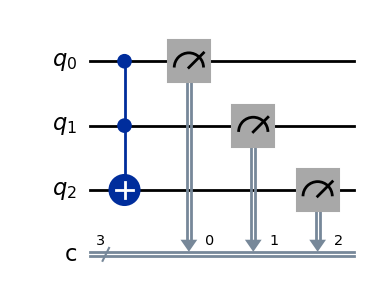

In [58]:
# Toffoli gate example
qc = QuantumCircuit(3, 3)
qc.ccx(0, 1, 2)
qc.measure(0, 0)
qc.measure(1, 1)
qc.measure(2, 2)
qc.draw('mpl')
plt.show()

## 📏 Measurement and Histograms

In quantum computing, **measurement collapses** a qubit to either |0⟩ or |1⟩. The result is probabilistic based on the qubit’s state.

For example, if a qubit is in state:

$$
|\psi\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)
$$

Then measuring it will give `0` or `1` with 50% probability each. Let’s run some measurements and plot the results using histograms.


### Measuring a Single Qubit in Superposition


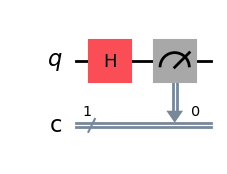

Measurement outcomes:  {'1': 498, '0': 526}


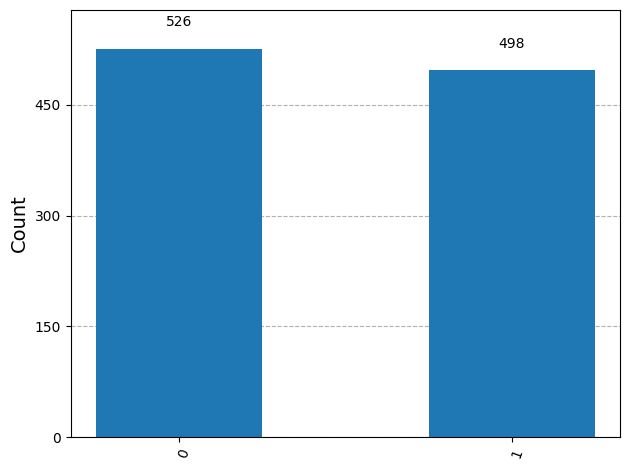

In [47]:
qc = QuantumCircuit(1, 1)

# Apply Hadamard gate to put the qubit in superposition
qc.h(0)
qc.measure(0, 0) # Measure the qubit into classical bit 0
qc.draw('mpl')
plt.show()

# Simulate
results = simulator.run(transpile(qc, simulator), shots=1024).result()
counts = results.get_counts()
plot_histogram(counts)
print("Measurement outcomes: ", counts)

## 🔗 Multi-Qubit Circuits and Entanglement

Quantum circuits can include multiple qubits and gates acting across them. This enables powerful phenomena like **entanglement**, where the state of one qubit depends on another.

A famous example is the **Bell state**:

$$
|\Phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
$$

We can build a Bell state by applying a Hadamard gate followed by a CNOT gate. Let’s try it.


### SWAP Gate: Traveling Qubits
The SWAP gate is a two-qubit gate that swaps the states of two qubits. It’s useful for moving qubits around in a quantum circuit.

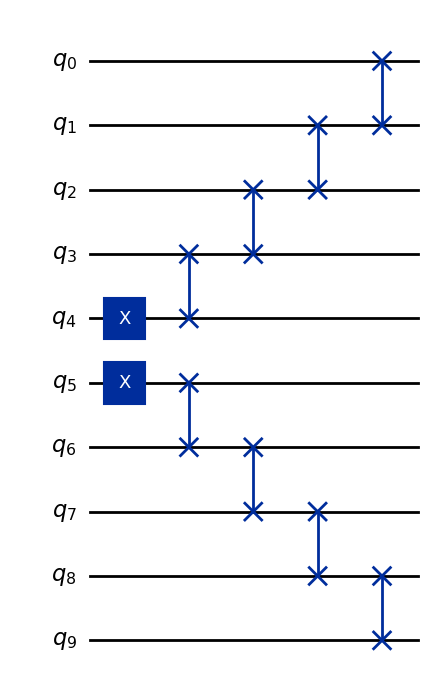

In [65]:
# SWAP gate example
qc = QuantumCircuit(10)
qc.x(4)
qc.swap(4, 3)
qc.swap(3, 2)
qc.swap(2, 1)
qc.swap(1, 0)

qc.x(5)
qc.swap(5, 6)
qc.swap(6, 7)
qc.swap(7, 8)
qc.swap(8, 9)

qc.draw('mpl')
plt.show()

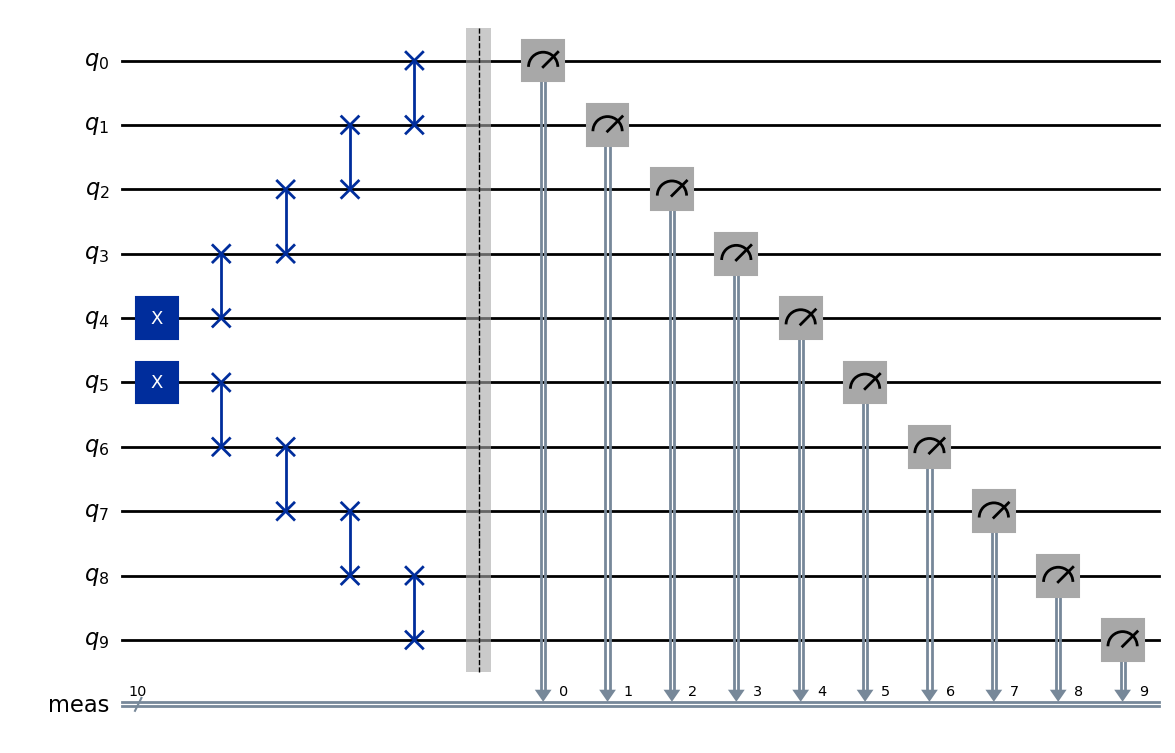

In [66]:
# Simulate the circuit and measure the qbit
qc.measure_all()
qc.draw('mpl')
plt.show()

Measurement outcomes:  {'1000000001': 1024}


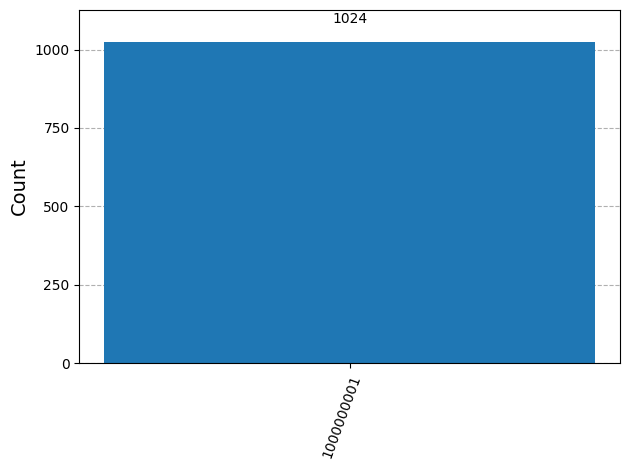

In [67]:
results = simulator.run(transpile(qc, simulator), shots=1024).result()
counts = results.get_counts()
plot_histogram(counts)
print("Measurement outcomes: ", counts)


### Entanglement: The Power of Qubits
Entanglement is a unique property of quantum systems where the state of one qubit is dependent on the state of another, no matter the distance between them. This phenomenon is what makes quantum computing so powerful and different from classical computing. 

The most famous example of entanglement is the **Bell state**, which can be created using a combination of Hadamard and CNOT gates.
### Bell State: Creating Entangled Qubits

$$
|\Phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
$$
$$
|\Phi^-\rangle = \frac{1}{\sqrt{2}}(|00\rangle - |11\rangle)
$$
$$
|\Psi^+\rangle = \frac{1}{\sqrt{2}}(|01\rangle + |10\rangle)
$$
$$
|\Psi^-\rangle = \frac{1}{\sqrt{2}}(|01\rangle - |10\rangle)
$$

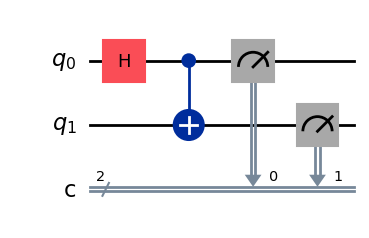

Measurement outcomes:  {'00': 518, '11': 506}


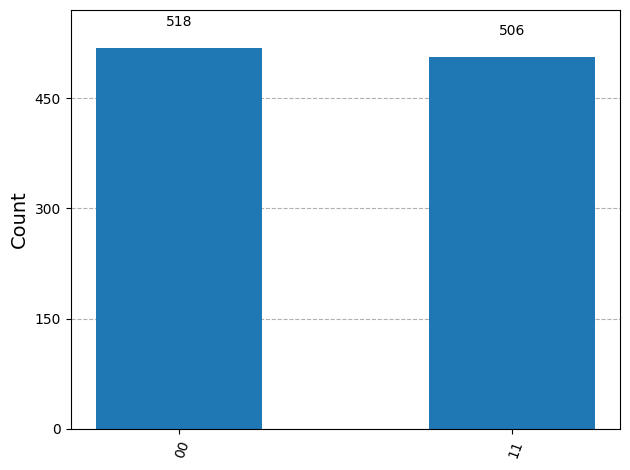

In [69]:
# Bell States Phi+
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure(0, 0)
qc.measure(1, 1)
qc.draw('mpl')
plt.show()

results = simulator.run(transpile(qc, simulator), shots=1024).result()
counts = results.get_counts()
plot_histogram(counts)
print("Measurement outcomes: ", counts)

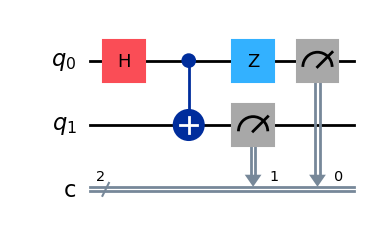

Measurement outcomes:  {'00': 522, '11': 502}


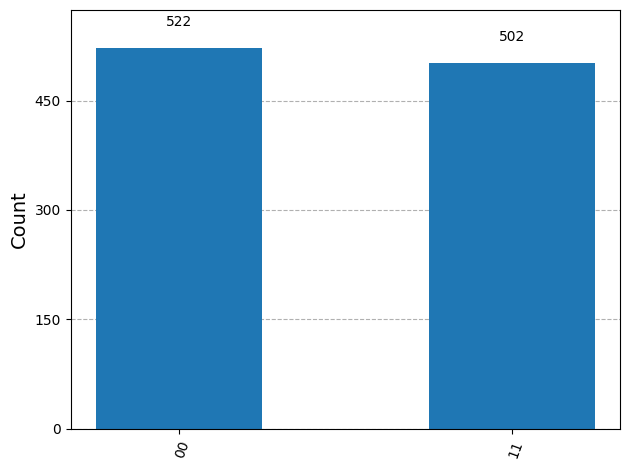

In [72]:
# Bell States Phi-
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.z(0)
qc.measure(0, 0)
qc.measure(1, 1)
qc.draw('mpl')
plt.show()

results = simulator.run(transpile(qc, simulator), shots=1024).result()
counts = results.get_counts()
plot_histogram(counts)
print("Measurement outcomes: ", counts)

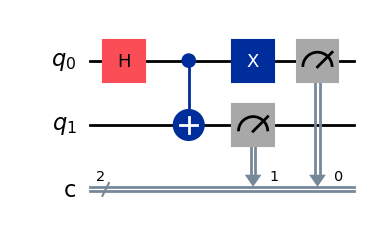

Measurement outcomes:  {'10': 513, '01': 511}


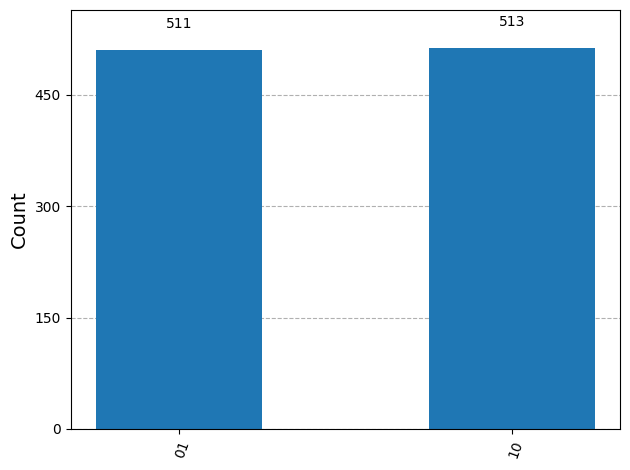

In [73]:
# Bell States Psi+
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.x(0)
qc.measure(0, 0)
qc.measure(1, 1)
qc.draw('mpl')
plt.show()

results = simulator.run(transpile(qc, simulator), shots=1024).result()
counts = results.get_counts()
plot_histogram(counts)
print("Measurement outcomes: ", counts)

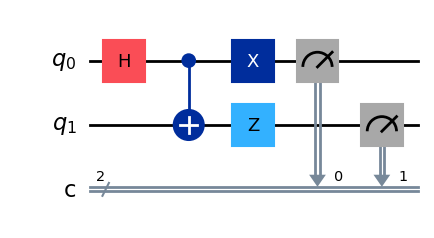

Measurement outcomes:  {'10': 507, '01': 517}


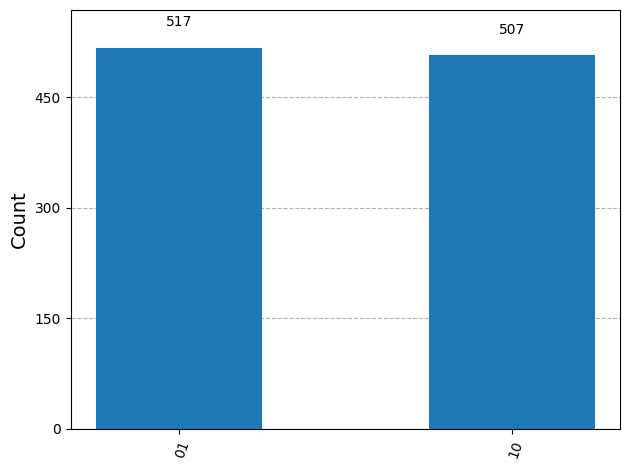

In [75]:
# Bell States Psi-
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.x(0)
qc.z(1)
qc.measure(0, 0)
qc.measure(1, 1)
qc.draw('mpl')
plt.show()

results = simulator.run(transpile(qc, simulator), shots=1024).result()
counts = results.get_counts()
plot_histogram(counts)
print("Measurement outcomes: ", counts)

## 🧠 Wrap-Up and Exploration

You’ve learned how to:
- Create and manipulate qubits
- Apply quantum gates
- Perform measurements
- Visualize results with histograms
- Build simple entangled states

This is just the beginning of quantum computing! Try modifying circuits, creating new gates, and running different simulations. Can you make a 3-qubit entangled state?
